# Set up and get data

In [13]:
# import pandas for data manipulation
import pandas as pd

In [14]:
# data updated daily by the NY Times
counties_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

In [15]:
# import the data from the csv url
counties = pd.read_csv(counties_url)

In [16]:
# look at the first 5 lines
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [19]:
# filter for rows where the state is "North Carolina"
nc = counties[counties['state'] == "North Carolina" ]
nc.head()

,date,county,state,fips,cases,deaths
483,2020-03-03,Wake,North Carolina,37183.0,1,0
520,2020-03-04,Wake,North Carolina,37183.0,1,0
567,2020-03-05,Wake,North Carolina,37183.0,1,0
630,2020-03-06,Chatham,North Carolina,37037.0,1,0
631,2020-03-06,Wake,North Carolina,37183.0,1,0


In [24]:
# filter for guilford county
guilford = nc[nc['county'] == 'Guilford']
guilford.head()

,date,county,state,fips,cases,deaths
4175,2020-03-18,Guilford,North Carolina,37081.0,1,0
4906,2020-03-19,Guilford,North Carolina,37081.0,2,0
5760,2020-03-20,Guilford,North Carolina,37081.0,4,0
6757,2020-03-21,Guilford,North Carolina,37081.0,4,0
7857,2020-03-22,Guilford,North Carolina,37081.0,11,0


# Make a bar chart of cases in Guilford County by day

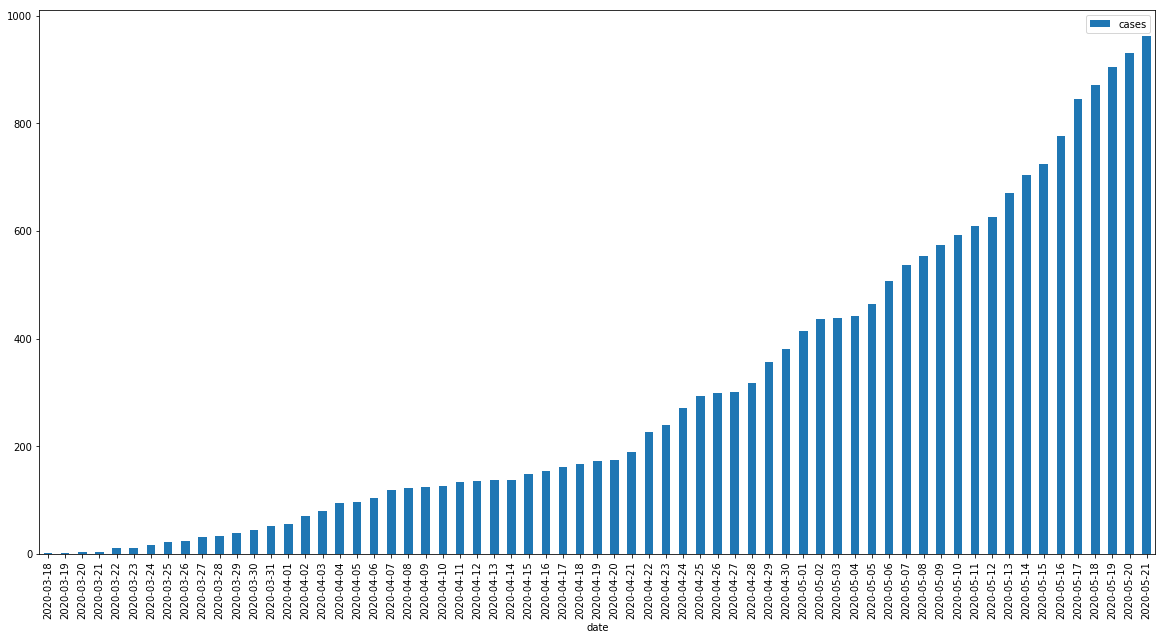

In [37]:
# import plotting tool
%matplotlib inline
import matplotlib.pyplot as plt

guilford.plot(
    kind="bar",
    x="date",
    y="cases",
    figsize=(20,10)
)

# Which county has experienced the highest growth in cases over the last 7 days?

In [38]:
nc.head()

,date,county,state,fips,cases,deaths
483,2020-03-03,Wake,North Carolina,37183.0,1,0
520,2020-03-04,Wake,North Carolina,37183.0,1,0
567,2020-03-05,Wake,North Carolina,37183.0,1,0
630,2020-03-06,Chatham,North Carolina,37037.0,1,0
631,2020-03-06,Wake,North Carolina,37183.0,1,0


In [78]:
# filter for the 14th and 21st
last_week = nc[(nc['date'] == '2020-05-14') | (nc['date'] == '2020-05-21')]
last_week = last_week[['date', 'county', 'cases']]

# pivot data
last_week = last_week.pivot(
    index='county',
    columns='date'
)

# calculate pct change and sort by largest increase
pct_change = last_week.pct_change(axis='columns')
pct_change.sort_values([('cases','2020-05-21')], ascending=False)

cases           
date      2020-05-14 2020-05-21
county                         
Madison          NaN   3.000000
Stokes           NaN   1.100000
Craven           NaN   0.944444
Ashe             NaN   0.823529
Buncombe         NaN   0.801724
...              ...        ...
Currituck        NaN   0.000000
Tyrrell          NaN   0.000000
Hyde             NaN   0.000000
Clay             NaN   0.000000
Avery            NaN        NaN

[100 rows x 2 columns]